## Лабораторная работа 4

Деревья решений

Выполнил: 6132-010402D, Рудинская Елизавета Андреевна

Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.
1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)

1.2. То же самое и использованием sklearn.pipeline.Pipeline

1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import probplot

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

0. Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [4]:
# Считывание датасета
df = pd.read_csv("student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Описание датасета
#### Атрибуты для наборов данных student-mat.csv (курс математики) и student-por.csv (курс португальского языка):

school - школа ученика (бинарный: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

sex - пол студента (бинарный: 'F' - женский or 'M' - мужской)

age - возраст студента (значения: от 15 до 22)

address -тип домашнего адреса студента (бинарный: 'U' - городской or 'R' - сельский)

famsize - размер семьи (бинарный: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - статус совместного проживания родителей (бинарный: 'T' - живут вместе или 'A' - раздельно)

Medu - образование матери  (значения: 0 - нет, 1 - начальное образование (4 класса), 2 – с 5 по 9 класс, 3 – среднее образование или 4 - высшее образование)

Fedu - образование отца  (значения: 0 - нет, 1 - начальное образование (4 класса), 2 – с 5 по 9 класс, 3 – среднее образование или 4 - высшее образование)

Mjob - работа матери (номинальный: 'учитель', 'здоровье' связанные со здравоохранением, гражданские "службы" (например, административные или полицейские), 'дома' или 'другое')

Fjob - работа отца (номинальный: 'учитель', 'здоровье' связанные со здравоохранением, гражданские "службы" (например, административные или полицейские), 'дома' или 'другое')

reason - причина выбора данной школы (номинальный: близость к  'дому', школьная 'репутация', предпочтение 'курс' или 'другое')

guardian - опекун студента (номинальный: 'мать', 'отец' или 'другое')

traveltime - время в пути от дома до школы (значения: 1 - <15 мин., 2 - от 15 до 30 мин., 3 - от 30 мин. до 1 ч, или 4 - >1 ч)

studytime - еженедельное учебное время (значения: 1 - <2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - >10 часов)

failures - количество неудач в прошлом классе (значения: n если 1 <= n <3, иначе 4)

schoolsup - дополнительная образовательная поддержка (бинарный: да или нет)

famsup - педагогическая поддержка семьи (бинарный: да или нет)

paid - дополнительные платные занятия в рамках предмета курса (Математика или Португальский язык) (бинарный: да или нет)

activities - внеклассные мероприятия (бинарный: да или нет)

nursery - посещеал ли детский сад (бинарный: да или нет)

higher - хочет получить высшее образование (бинарный: да или нет)

internet - Доступ в Интернет дома (бинарный: да или нет)

romantic - с романтическими отношениями (бинарный: да или нет)

famrel - качество семейных отношений (значения: от 1 - очень плохо до 5 - отлично)

freetime - свободное время после школы (значения: от 1 - очень низкий до  5 - очень высокий)

goout - прогулки с друзьями (значения: от 1 - очень низкий до  5 - очень высокий)

Dalc - употребление алкоголя в течение рабочего дня (значения: от 1 - очень низкий до  5 - очень высокий)

Walc - употребление алкоголя в выходные дни (значения: от 1 - очень низкий до  5 - очень высокий)

health - текущее состояние здоровья (значения: от 1 - очень плохо до 5 - очень хорошо)

absences - количество пропусков занятий (значения: от 0 до 93)


### Оценки, связанные с предматами: математика или португальский язык

G1 - оценка за первый период (значения: от 0 до 20)

G2 - оценка за второй период (значения: от 0 до 20)

G3 - финальная оценка (значения: от 0 до 20, выходной показатель)


In [2]:
# Функция условной бинарной градации записей на основании рейтига
def binary_ratio(r):
    if r > 15 :
        c = 'High'
    else:
        c = 'Low'
    return c

In [23]:
data = pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
# Оставим только столбцы типа int

#data_new = data.drop(columns=data.iloc[:, range(2)]) 
data_new = data.drop(columns=['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'guardian', 'famsup', 'paid', 'schoolsup', 'activities', 'nursery', 'higher', 'internet', 'romantic']) 
data_new

,sex,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,F,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,F,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,F,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,F,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,M,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,M,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,M,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [29]:
# Преобразуем данные и добавляем условыне классы на основании рейтинга Avg_viewer_ratio, где High - высокий и Low - низний рейтинги средего просмотра контента.
data_binary = data_new.copy()
#data_binary['G3'] = data_binary.apply(lambda x: x['G3'].replace(' results', '') , axis=1)
data_binary['Binary_Ratio'] = data_binary.apply(lambda row: binary_ratio(row['G3']), axis = 1)
data_binary = data_binary.drop(columns = ['sex', 'age'], axis = 1)

data_binary.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Binary_Ratio
0,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,Low
1,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,Low
2,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,Low
3,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,Low
4,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,Low


1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [30]:
factor = pd.factorize(data_binary['Binary_Ratio'])
data_binary.Binary_Ratio = factor[0]
definitions = factor[1]

print(data_binary.Binary_Ratio.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Binary_Ratio, dtype: int64
Index(['Low'], dtype='object')


1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)

Разделим набор данных на независимые и зависимые переменные.

Все столбцы (без предпоследнего) являются независимыми переменными.

Cтолбец "Binary_Ratio" - будет зависимой переменной.

Сохраняем как массив.

In [38]:
X = data_binary.iloc[:, 0:10].values
X

array([[4, 4, 2, ..., 4, 1, 1],
       [1, 1, 1, ..., 3, 1, 1],
       [1, 1, 1, ..., 2, 2, 3],
       ...,
       [1, 1, 1, ..., 3, 3, 3],
       [3, 2, 3, ..., 1, 3, 4],
       [1, 1, 1, ..., 3, 3, 3]], dtype=int64)

In [39]:
Y = data_binary.iloc[:, 10].values
Y

array([3, 3, 3, 5, 5, 5, 3, 1, 1, 5, 2, 4, 5, 3, 3, 2, 2, 4, 5, 5, 1, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 2, 5, 5, 4, 5, 5, 2, 3, 5, 5, 1,
       5, 5, 3, 2, 5, 3, 4, 5, 5, 5, 1, 2, 1, 5, 5, 5, 4, 5, 1, 4, 2, 1,
       3, 5, 4, 3, 5, 3, 5, 5, 5, 5, 1, 3, 3, 3, 3, 5, 5, 4, 4, 5, 2, 1,
       3, 5, 4, 1, 2, 1, 4, 1, 4, 5, 1, 3, 4, 4, 5, 2, 1, 4, 3, 5, 1, 4,
       4, 2, 5, 3, 5, 5, 2, 5, 5, 4, 1, 5, 5, 5, 5, 5, 1, 5, 4, 4, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 3, 2, 5, 1, 5, 5, 3, 5, 5, 5, 4, 5, 3, 4,
       4, 1, 5, 4, 3, 5, 5, 3, 5, 2, 5, 2, 4, 3, 4, 3, 2, 3, 5, 3, 4, 4,
       5, 4, 3, 2, 3, 3, 5, 1, 1, 4, 3, 5, 3, 3, 2, 3, 5, 5, 3, 5, 5, 3,
       2, 3, 2, 4, 1, 3, 5, 5, 4, 1, 5, 4, 3, 3, 4, 5, 3, 1, 1, 4, 3, 4,
       5, 5, 3, 4, 5, 4, 3, 3, 3, 3, 3, 1, 2, 1, 5, 2, 4, 5, 3, 2, 5, 4,
       3, 5, 3, 4, 2, 1, 5, 5, 5, 2, 5, 3, 5, 5, 4, 1, 4, 2, 2, 3, 3, 4,
       3, 1, 5, 4, 5, 3, 5, 2, 3, 1, 1, 5, 5, 3, 4, 1, 5, 3, 3, 4, 5, 4,
       2, 3, 2, 2, 5, 3, 5, 3, 4, 5, 2, 2, 3, 1, 4,

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# пусть для 15 соседей
   
model_KNBC = KNeighborsClassifier(n_neighbors = 15)
    
model_KNBC.fit(X_train, Y_train)
Y_KNBC = model_KNBC.predict(X_test)

# accuracy
print (f'Accuracy = {accuracy_score(Y_test, Y_KNBC) * 100}%')

Accuracy = 35.35353535353536%


1.2. То же самое и использованием sklearn.pipeline.Pipeline

In [41]:
scaler = StandardScaler()
KNBC = KNeighborsClassifier()

steps = [('normalizer', scaler), ('KNBC', KNBC)]
pipe = Pipeline(steps)

In [42]:
pipe

Pipeline(steps=[('normalizer', StandardScaler()),
                ('KNBC', KNeighborsClassifier())])

1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

Гиперпараметры - настраиваемые параметры, которые необходимо настроить, чтобы получить модель с оптимальными характеристиками.

Для KNeighborsClassifier:
* n_neighbors - это количество соседей, которые нужно использовать
* weights - весовая функция,используемая при прогнозировании
* algorithm - алгоритм, используемый для вычисления ближайших соседей

In [43]:
params_KNBC = \
     {'KNBC__n_neighbors': np.arange(5, 50), 
     'KNBC__weights': ['uniform', 'distance'], 
     'KNBC__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNBC = GridSearchCV(pipe, params_KNBC)
grid_search_KNBC.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('KNBC', KNeighborsClassifier())]),
             param_grid={'KNBC__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                             'brute'],
                         'KNBC__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'KNBC__weights': ['uniform', 'distance']})

In [44]:
print(f'Score: {grid_search_KNBC.score(X_test, Y_test)}')
grid_search_KNBC.best_params_

Score: 0.42424242424242425


{'KNBC__algorithm': 'brute',
 'KNBC__n_neighbors': 45,
 'KNBC__weights': 'distance'}

2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [45]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
# accuracy
print (f'Accuracy = {accuracy_score(Y_test, DTC.predict(X_test)) * 100}%')

Accuracy = 29.292929292929294%


2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

Гиперпараметры: max_depth, max_features

In [46]:
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

params_DTC = \
     {'DTC__max_depth': np.arange(1, 10),
     'DTC__splitter': ['best', 'random'],
     'DTC__criterion': ['gini', 'entropy'],
     'DTC__max_features': ['auto', 'sqrt', 'log2']}

grid_search_DTC = GridSearchCV(pipe_DTC, params_DTC)

grid_search_DTC.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('DTC', DecisionTreeClassifier())]),
             param_grid={'DTC__criterion': ['gini', 'entropy'],
                         'DTC__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'DTC__max_features': ['auto', 'sqrt', 'log2'],
                         'DTC__splitter': ['best', 'random']})

In [47]:
print(f'Score: {grid_search_DTC.score(X_test, Y_test)}')
grid_search_DTC.best_params_

Score: 0.40404040404040403


{'DTC__criterion': 'gini',
 'DTC__max_depth': 2,
 'DTC__max_features': 'log2',
 'DTC__splitter': 'random'}

2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

In [48]:
print(DTC.feature_importances_)

[0.08742185 0.13517274 0.07406387 0.13706768 0.06721511 0.14793272
 0.11447304 0.07075417 0.06567541 0.1002234 ]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

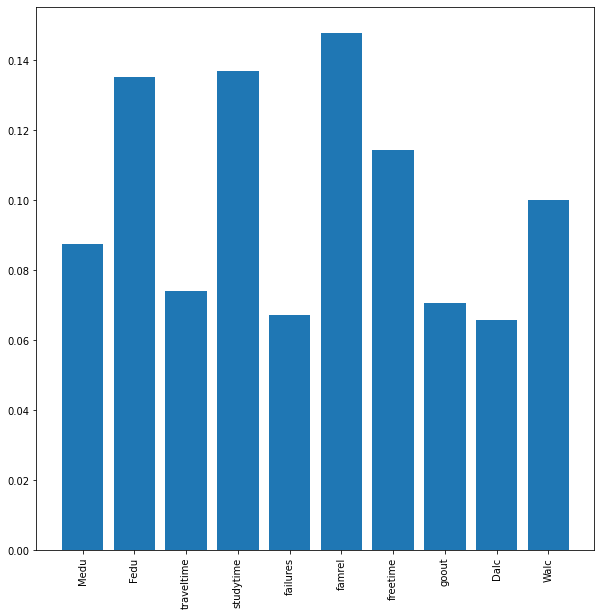

In [50]:
plt.figure(figsize=(10,10))
plt.bar(data_binary.columns[0:10], DTC.feature_importances_)
plt.xticks(rotation=90)

In [51]:
# признак - значимость
l = np.vstack([DTC.feature_importances_, data_binary.columns[0:10]]).T

In [52]:
# сортируем
sorted(l, key = lambda x: x[0], reverse=True)

[array([0.1479327181139536, 'famrel'], dtype=object),
 array([0.13706768499762345, 'studytime'], dtype=object),
 array([0.13517274248156433, 'Fedu'], dtype=object),
 array([0.11447304003298443, 'freetime'], dtype=object),
 array([0.10022340115507668, 'Walc'], dtype=object),
 array([0.08742185444351958, 'Medu'], dtype=object),
 array([0.07406386932937183, 'traveltime'], dtype=object),
 array([0.07075416583348708, 'goout'], dtype=object),
 array([0.06721511327832654, 'failures'], dtype=object),
 array([0.06567541033409255, 'Dalc'], dtype=object)]

3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [53]:
RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RFC.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [54]:
print (f'Accuracy = {accuracy_score(Y_test, RFC.predict(X_test)) * 100}%')

Accuracy = 38.38383838383838%


3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [55]:
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy'],
     'RFC__max_features': ['auto', 'sqrt', 'log2']}
grid_search_RFC = GridSearchCV(pipe_RFC, params_RFC)

grid_search_RFC.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('RFC',
                                        RandomForestClassifier(criterion='entropy',
                                                               n_estimators=10,
                                                               random_state=42))]),
             param_grid={'RFC__criterion': ['gini', 'entropy'],
                         'RFC__max_features': ['auto', 'sqrt', 'log2'],
                         'RFC__n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [56]:
print(grid_search_RFC.score(X_test, Y_test))
grid_search_RFC.best_params_

0.3939393939393939


{'RFC__criterion': 'entropy',
 'RFC__max_features': 'auto',
 'RFC__n_estimators': 92}

Выводы

In [57]:
# 1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)
print (f'KNeighborsClassifier Accuracy = {accuracy_score(Y_test, Y_KNBC) * 100}%')
# 1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели.¶
print(f'Score: {grid_search_KNBC.score(X_test, Y_test)}')
grid_search_KNBC.best_params_

KNeighborsClassifier Accuracy = 35.35353535353536%
Score: 0.42424242424242425


{'KNBC__algorithm': 'brute',
 'KNBC__n_neighbors': 45,
 'KNBC__weights': 'distance'}

In [58]:
# 2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке
print (f'DecisionTreeClassifier Accuracy = {accuracy_score(Y_test, DTC.predict(X_test)) * 100}%')
# 2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева
print(f'GridSearchCV Tree Score: {grid_search_DTC.score(X_test, Y_test)}')
grid_search_DTC.best_params_

DecisionTreeClassifier Accuracy = 29.292929292929294%
GridSearchCV Tree Score: 0.40404040404040403


{'DTC__criterion': 'gini',
 'DTC__max_depth': 2,
 'DTC__max_features': 'log2',
 'DTC__splitter': 'random'}

In [60]:
# 3.1. Продемонстрировать работу случайного леса RandomForestClassifier
print (f'RandomForestClassifier Accuracy = {accuracy_score(Y_test, RFC.predict(X_test)) * 100}%')
# 3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего леса, посмотреть насколько улучшились метрики
print(f'GridSearchCV Forest Score: {grid_search_RFC.score(X_test, Y_test)}')
grid_search_RFC.best_params_

RandomForestClassifier Accuracy = 38.38383838383838%
GridSearchCV Forest Score: 0.3939393939393939


{'RFC__criterion': 'entropy',
 'RFC__max_features': 'auto',
 'RFC__n_estimators': 92}

Лучший результат на основании Accuracy дал классификатор RandomForestClassifier  с параметрами:
* criterion: entropy
* max_features: auto
* n_estimators: 92
* splitter: best